# ✈️ Aircraft Risk Analysis — Data Science Project

## 1. Business Understanding

### 📌 Project Overview
As part of its expansion strategy, our company is exploring entry into the aviation sector by acquiring aircraft for commercial and private use. However, the leadership team has limited knowledge of the operational and safety risks associated with different types of aircraft.

This project aims to leverage historical aviation accident data to help identify **which aircraft types pose the lowest risk**, enabling the business to make **data-driven decisions** about its initial investments.

### 🎯 Business Objective
The goal is to analyze patterns in aviation accidents from 1962 to 2023 to:
- Identify key factors contributing to aircraft risk,
- Determine which aircraft types are historically safest,
- Deliver **three concrete recommendations** for which aircraft the company should prioritize for purchase.

The final output will support the **head of the aviation division** with strategic insights to inform acquisition decisions.

---

## 2. Audience & Approach

This notebook is intended for a **technical data science audience** and outlines the full analytical process using Python and Markdown. The results will be presented separately in a non-technical format for business stakeholders.

### 👣 Project Steps:
1. **Data Understanding** — Explore and understand the dataset structure and content  
2. **Data Preparation** — Clean, transform, and engineer relevant features  
3. **Data Analysis** — Visualize trends, compare aircraft categories, and assess risk  
4. **Recommendations** — Deliver insights with business impact

All visualizations and conclusions are tied directly to the core business question:  
> *Which aircraft types are the lowest-risk investments for our company?*

---
---


   # 1. Data Understanding

In [1532]:
# First, we're going to import the necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numby

## 1.1. Exploring the Aircraft Accident Dataset
To begin our analysis, we first need to understand the structure and contents of the dataset. 
The aviation accident data comes from the National Transportation Safety Board (NTSB) and includes over 90,000 records from 1962 to 2023. Each row represents an aviation event, with details ranging from the event date and location to aircraft specifications, injuries, weather, and flight purpose.

Below is the first step: loading the dataset and inspecting its columns, types, and missing values.

In [1533]:
# import the dataset
path = './data/Aviation_Data.csv'
aviation_data = pd.read_csv(path, dtype='str')

# display basic info
aviation_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                88889 non-null  object
 1   Investigation.Type      90348 non-null  object
 2   Accident.Number         88889 non-null  object
 3   Event.Date              88889 non-null  object
 4   Location                88837 non-null  object
 5   Country                 88663 non-null  object
 6   Latitude                34382 non-null  object
 7   Longitude               34373 non-null  object
 8   Airport.Code            50132 non-null  object
 9   Airport.Name            52704 non-null  object
 10  Injury.Severity         87889 non-null  object
 11  Aircraft.damage         85695 non-null  object
 12  Aircraft.Category       32287 non-null  object
 13  Registration.Number     87507 non-null  object
 14  Make                    88826 non-null  object
 15  Mo

In [1534]:
# display first few rows
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## ✳️ 1.2. Selected Features for Risk Assessment

To conduct a meaningful and targeted analysis, the following features were selected from the dataset. These variables are directly tied to **aircraft safety, accident outcomes**, and **operational conditions**, and are thus essential for deriving **actionable insights** for low-risk aircraft recommendations.

| Feature                        | Description                                                                                   |
|-------------------------------|-----------------------------------------------------------------------------------------------|
| **Make & Model**              | Identify aircraft manufacturers and specific models with safer historical records.            |
| **Aircraft.Category**         | Filter aircraft by type to segment the analysis.                 |
| **Aircraft.damage**           | Indicates the extent of physical damage to the aircraft, used as a proxy for incident severity. |
| **Injury.Severity**           | Qualitative summary of injury outcomes.                   |
| **Total.Fatal.Injuries**      | Number of fatalities in an incident.                                                          |
| **Total.Serious.Injuries**    | Number of seriously injured individuals.                                                      |
| **Total.Minor.Injuries**      | Number of minor injuries sustained.                                                           |
| **Total.Uninjured**           | Count of people who were not injured, despite the accident.                                   |
| **Number.of.Engines**         | Single vs. multi-engine — for comparing their correlation with incident severity.             |
| **Engine.Type**               | Different engine technologies may present different risk profiles.                            |
| **Purpose.of.flight**         | Whether the flight was private, commercial, etc. — useful for contextual analysis. |
| **Weather.Condition**         | Understand how weather affects accident outcomes.                         |
| **Broad.phase.of.flight**     | Identify the riskiest phases.                                |
| **Amateur.Built**             | Filter out homebuilt aircraft which typically have higher risk profiles.                      |
| **Event.Date**                |                                                                                                |

> 🟢 **Rationale**: These features are most relevant to quantifying accident outcomes, understanding flight risk conditions, and analyzing aircraft specifications — all critical to evaluating **which aircraft types present the lowest operational risk**.


In [1535]:
# Select the relevant columns
selected_columns = [
    "Make",
    "Model",
    "Aircraft.Category",
    "Aircraft.damage",
    "Injury.Severity",
    "Total.Fatal.Injuries",
    "Total.Serious.Injuries",
    "Total.Minor.Injuries",
    "Total.Uninjured",
    "Number.of.Engines",
    "Engine.Type",
    "Purpose.of.flight",
    "Weather.Condition",
    "Broad.phase.of.flight",
    "Amateur.Built",
    "Event.Date"
]

# 2. Data Preparation

Before diving into analysis, it is crucial to prepare the dataset to ensure accuracy, consistency, and usability. This phase involves cleaning and transforming the raw data into a structured form that supports meaningful insights.

### Objectives of this Phase:
- Select only relevant columns related to aircraft safety and risk.
- Handle missing or inconsistent values appropriately.
- Convert data types where necessary.
- Standardize and normalize categorical fields to reduce redundancy.
- Remove duplicate or irrelevant entries.

The ultimate goal is to create a clean, reliable dataset that accurately reflects real-world safety patterns and is suitable for further exploration and modeling.


In [1536]:
# We'll use only the relevant colummns to reduce noise
aviation_data = aviation_data[selected_columns]

In [1537]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Make                    88826 non-null  object
 1   Model                   88797 non-null  object
 2   Aircraft.Category       32287 non-null  object
 3   Aircraft.damage         85695 non-null  object
 4   Injury.Severity         87889 non-null  object
 5   Total.Fatal.Injuries    77488 non-null  object
 6   Total.Serious.Injuries  76379 non-null  object
 7   Total.Minor.Injuries    76956 non-null  object
 8   Total.Uninjured         82977 non-null  object
 9   Number.of.Engines       82805 non-null  object
 10  Engine.Type             81793 non-null  object
 11  Purpose.of.flight       82697 non-null  object
 12  Weather.Condition       84397 non-null  object
 13  Broad.phase.of.flight   61724 non-null  object
 14  Amateur.Built           88787 non-null  object
 15  Ev

In [1538]:
aviation_data.head()

,Make,Model,Aircraft.Category,Aircraft.damage,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Amateur.Built,Event.Date
0,Stinson,108-3,NaN,Destroyed,Fatal(2),2.0,0.0,0.0,0.0,1.0,Reciprocating,Personal,UNK,Cruise,No,1948-10-24
1,Piper,PA24-180,NaN,Destroyed,Fatal(4),4.0,0.0,0.0,0.0,1.0,Reciprocating,Personal,UNK,Unknown,No,1962-07-19
2,Cessna,172M,NaN,Destroyed,Fatal(3),3.0,NaN,NaN,NaN,1.0,Reciprocating,Personal,IMC,Cruise,No,1974-08-30
3,Rockwell,112,NaN,Destroyed,Fatal(2),2.0,0.0,0.0,0.0,1.0,Reciprocating,Personal,IMC,Cruise,No,1977-06-19
4,Cessna,501,NaN,Destroyed,Fatal(1),1.0,2.0,NaN,0.0,NaN,NaN,Personal,VMC,Approach,No,1979-08-02


### 2.1. Handling missing or inconsistent values

> <p>The dataFrame has over 90 000 records, as we can see the <b>'Aircraft.Category'</b> column contains 32,287 non-null values. It's better to remove this column as it contains too many null values.. </p>
> <p>We'll assume that the null values in columns containing numerical data are equal to their respective medians..
These columns are : 
1. **Total.Fatal.Injuries**
2. **Total.Serious.Injuries**
3. **Total.Minor.Injuries**
4. **Total.Uninjured**
5. **Number.of.Engines** </p>
> *We use the **median** to impute missing values in the injury and engine-related columns because these features are often **skewed** due to extreme outliers, and the median is more **robust** to such irregularities than the mean.*


In [1539]:
# Let's remove the 'Aircraft.Category'.
to_drop = "Aircraft.Category"
aviation_data.drop(to_drop, axis=1, inplace=True)

In [1540]:
aviation_data.columns

Index(['Make', 'Model', 'Aircraft.damage', 'Injury.Severity',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.Engines',
       'Engine.Type', 'Purpose.of.flight', 'Weather.Condition',
       'Broad.phase.of.flight', 'Amateur.Built', 'Event.Date'],
      dtype='object')

### 2.2. Converting data types where necessary

<p>Before replacing the null values, let's convert the columns containing numerical values to their respective types.</p>

In [1541]:

"""
let's convert the columns containing numerical values to 'float' types and 
replace the null values for columns in 'numeric_col'.
"""

numeric_col = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Number.of.Engines',
    
]

for col in numeric_col:
    aviation_data[col] = aviation_data[col].astype(float)
    aviation_data[col] = aviation_data[col].fillna(aviation_data[col].median())


### 2.3. Handle missing values for categorical columns and remove all duplicate rows.
>To preserve the integrity of our dataset and avoid losing valuable records, we chose to **replace missing values** with a placeholder string: `NULL_V`. This approach was applied to selected **categorical columns** that are critical for our risk analysis but had a significant number of missing entries:

In [1542]:
# handle missing values for categorical columns
categorical_col = [
    'Broad.phase.of.flight',
    'Engine.Type',
    'Purpose.of.flight',
    'Weather.Condition',
    'Amateur.Built',
    'Injury.Severity',
    'Aircraft.damage' 
]
for col in categorical_col:
    aviation_data[col] = aviation_data[col].fillna('NULL_V')
aviation_data[categorical_col[3]] = aviation_data[categorical_col[3]].str.upper()
aviation_data['Make'] = aviation_data['Make'].str.upper()
aviation_data['Model'] = aviation_data['Model'].str.upper()
# First let's convert our 'Event.Date' column to datetime format
aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'])

In [1543]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Make                    88826 non-null  object        
 1   Model                   88797 non-null  object        
 2   Aircraft.damage         90348 non-null  object        
 3   Injury.Severity         90348 non-null  object        
 4   Total.Fatal.Injuries    90348 non-null  float64       
 5   Total.Serious.Injuries  90348 non-null  float64       
 6   Total.Minor.Injuries    90348 non-null  float64       
 7   Total.Uninjured         90348 non-null  float64       
 8   Number.of.Engines       90348 non-null  float64       
 9   Engine.Type             90348 non-null  object        
 10  Purpose.of.flight       90348 non-null  object        
 11  Weather.Condition       90348 non-null  object        
 12  Broad.phase.of.flight   90348 non-null  object

> <p>For the <b>Make</b> and <b>Model</b> columns, we can't replace the missing values because these fields uniquely identify the aircraft's manufacturer and specific type. Any imputation, such as using a common value or placeholder, would introduce inaccurate information that could lead to false conclusions about which aircraft are safest. Since our goal is to assess risk by aircraft type, keeping only rows with known Make and Model ensures the reliability of our insights.</p>

In [1544]:
# let's drop all rows with missing and duplicates values 
aviation_data.drop_duplicates(inplace=True)
aviation_data.dropna(inplace=True)
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88664 entries, 0 to 90347
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Make                    88664 non-null  object        
 1   Model                   88664 non-null  object        
 2   Aircraft.damage         88664 non-null  object        
 3   Injury.Severity         88664 non-null  object        
 4   Total.Fatal.Injuries    88664 non-null  float64       
 5   Total.Serious.Injuries  88664 non-null  float64       
 6   Total.Minor.Injuries    88664 non-null  float64       
 7   Total.Uninjured         88664 non-null  float64       
 8   Number.of.Engines       88664 non-null  float64       
 9   Engine.Type             88664 non-null  object        
 10  Purpose.of.flight       88664 non-null  object        
 11  Weather.Condition       88664 non-null  object        
 12  Broad.phase.of.flight   88664 non-null  object     

In [1545]:
aviation_data.head()

,Make,Model,Aircraft.damage,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Amateur.Built,Event.Date
0,STINSON,108-3,Destroyed,Fatal(2),2.0,0.0,0.0,0.0,1.0,Reciprocating,Personal,UNK,Cruise,No,1948-10-24
1,PIPER,PA24-180,Destroyed,Fatal(4),4.0,0.0,0.0,0.0,1.0,Reciprocating,Personal,UNK,Unknown,No,1962-07-19
2,CESSNA,172M,Destroyed,Fatal(3),3.0,0.0,0.0,1.0,1.0,Reciprocating,Personal,IMC,Cruise,No,1974-08-30
3,ROCKWELL,112,Destroyed,Fatal(2),2.0,0.0,0.0,0.0,1.0,Reciprocating,Personal,IMC,Cruise,No,1977-06-19
4,CESSNA,501,Destroyed,Fatal(1),1.0,2.0,0.0,0.0,1.0,NULL_V,Personal,VMC,Approach,No,1979-08-02


> To facilitate aircraft-specific risk analysis, we combined the **Make** and **Model** columns into a single **Aircraft.Type** column. This allows us to treat each unique aircraft configuration as a distinct entity for clearer comparison and aggregation.

In [1546]:
# Define the new column name for aircraft type
a_t_str = 'Aircraft.Type'

aviation_data_copy = aviation_data.copy()
# Create 'Aircraft.Type' column by combining 'Make' and 'Model' with a separator
aviation_data[a_t_str] = aviation_data['Make'].str.strip() + " -- " + aviation_data['Model'].str.strip()

# Specify the columns to be removed after merging them into 'Aircraft.Type'
to_drop = ['Make', 'Model']

# Drop the 'Make' and 'Model' columns from the dataframe
aviation_data.drop(to_drop, axis=1, inplace=True)

# Remove the 'Aircraft.Type' column from its current position
a_t = aviation_data.pop(a_t_str)

# Insert the 'Aircraft.Type' column at the beginning of the dataframe for better readability
aviation_data.insert(0, a_t_str, a_t)

# Display the first few rows of the updated dataframe
aviation_data.head()

,Aircraft.Type,Aircraft.damage,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Amateur.Built,Event.Date
0,STINSON -- 108-3,Destroyed,Fatal(2),2.0,0.0,0.0,0.0,1.0,Reciprocating,Personal,UNK,Cruise,No,1948-10-24
1,PIPER -- PA24-180,Destroyed,Fatal(4),4.0,0.0,0.0,0.0,1.0,Reciprocating,Personal,UNK,Unknown,No,1962-07-19
2,CESSNA -- 172M,Destroyed,Fatal(3),3.0,0.0,0.0,1.0,1.0,Reciprocating,Personal,IMC,Cruise,No,1974-08-30
3,ROCKWELL -- 112,Destroyed,Fatal(2),2.0,0.0,0.0,0.0,1.0,Reciprocating,Personal,IMC,Cruise,No,1977-06-19
4,CESSNA -- 501,Destroyed,Fatal(1),1.0,2.0,0.0,0.0,1.0,NULL_V,Personal,VMC,Approach,No,1979-08-02


# 3. Data Analysis
In this phase, we explore the cleaned dataset to uncover patterns, trends, and key insights related to aircraft safety and accident risks, with the goal of identifying low-risk aircraft for business recommendations.

---
---
### Trend of Aircraft Incidents Over Time

To begin our analysis, we explore how aircraft incidents have evolved over the years. This helps us understand whether the overall risk has increased or decreased with time, and may also reveal patterns influenced by industry regulations, technological advancements, or operational changes.


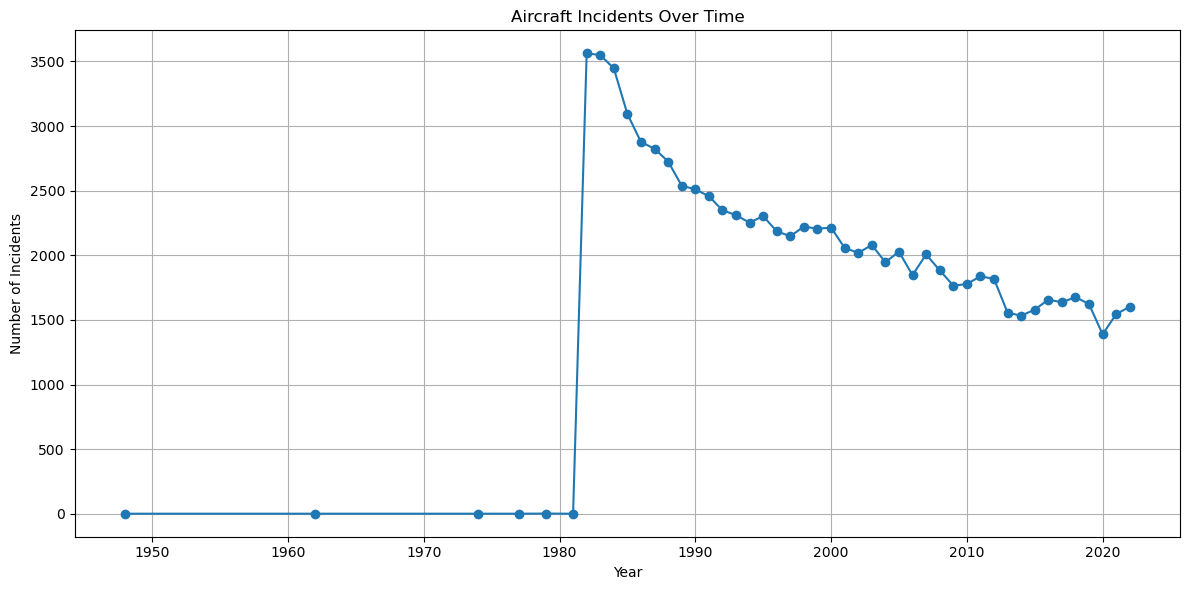

In [1547]:


# Extract year
aviation_data['year'] = aviation_data['Event.Date'].dt.year

# Count incidents per year
incidents_per_year = aviation_data['year'].value_counts().sort_index()

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(incidents_per_year.index, incidents_per_year.values, marker='o')
ax.set_title('Aircraft Incidents Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretation:**

The graph above illustrates the trend of aircraft incidents over time. We can observe a clear decrease in the number of incidents as the years progress. The peak occurred around 1980, after which there has been a steady decline. This trend may suggest improvements in aviation technology, stricter safety regulations, and better training over the decades.


### Evolution of accident severity over time
<p>To better understand the evolution of accident severity over time, I will now analyze the yearly trends for different types of injuries, including fatal, serious, minor, and uninjured cases.</p>



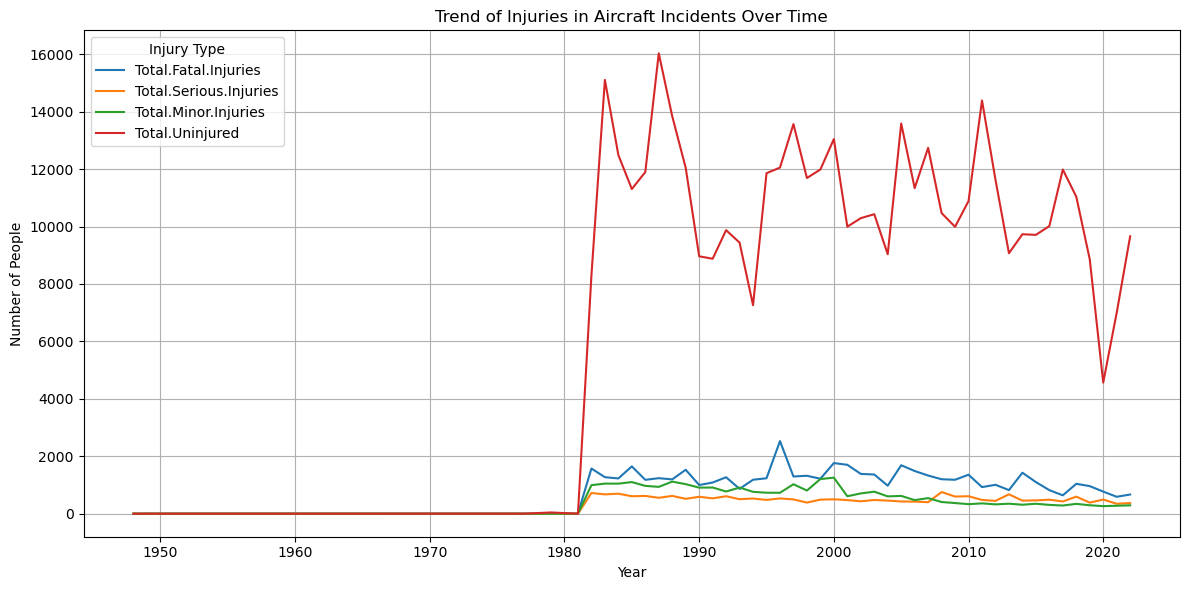

In [1548]:
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
group_by_year = aviation_data.groupby('year')[injury_cols].sum()
group_by_year.plot(figsize=(12, 6), kind='line')
plt.title('Trend of Injuries in Aircraft Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.legend(title='Injury Type')
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation**
## Aviation Injury Trends Over Time

**Key Observations:**
- **Fatal Injuries:**
  - Peaked 1990-2000
  - General downward trend post-peak
  - Non-linear but consistent improvement

- **Serious vs. Minor Injuries:**
  - Serious injuries consistently lower than minor
  - Both show gradual decline after peaks
  - Similar fluctuation patterns

- **Uninjured Cases:**
  - Peak occurrence 1980-1990
  - Subsequent decrease with high variability

**Interpretation:**
1. **Safety Improvements:**
   - Reduction in all injury categories suggests:
     - Enhanced safety technologies
     - Improved operational procedures
     - Better training standards

2. **Notable Patterns:**
   - Fatal injury decline most significant
   - Serious/minor injury parallel trends may indicate:
     - Similar causal factors
     - Consistent reporting practices

3. **Uninjured Case Analysis:**
   - Decreasing trend could reflect:
     - Fewer total incidents
     - Changes in reporting thresholds
     - Evolving classification standards

4. **Overall Implications:**
   - Positive safety trajectory evident
   - Continued monitoring needed for:
     - Emerging risk factors
     - Changing operational environments

### Analyze by purpose of flight
To better understand the operational context of the incidents, the following chart displays the distribution of accidents by the **purpose of flight**. This helps identify which types of operations—such as personal, instructional, or commercial—are more frequently involved in accidents, offering valuable insight into risk levels associated with flight intent.

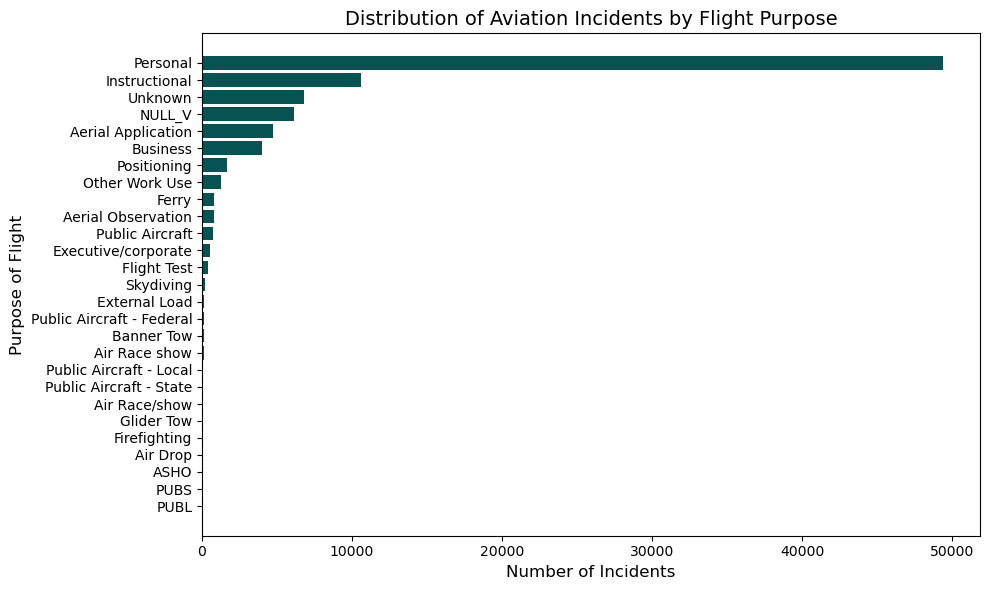

In [1549]:
# Count the number of occurrences for each flight purpose
purpose_of_flight = aviation_data['Purpose.of.flight'].value_counts()

# Sort the values in ascending order for better readability
purpose_of_flight = purpose_of_flight.sort_values()

# Set up the figure and axis with a custom size
fig, ax = plt.subplots(figsize=(10, 6))

# Extract x (categories) and y (counts) for plotting
x = purpose_of_flight.index
y = purpose_of_flight.values

# Create a horizontal bar chart
ax.barh(x, y, color='#075252')

# Add axis labels and a title
ax.set_xlabel('Number of Incidents', fontsize=12)
ax.set_ylabel('Purpose of Flight', fontsize=12)
ax.set_title('Distribution of Aviation Incidents by Flight Purpose', fontsize=14)

# Optional: Improve layout and spacing
plt.tight_layout()

# Display the plot
plt.show()


## Flight Purpose Distribution in Aviation Incidents

**Findings:**
- **Personal Flights:** Highest incident count
- **Instructional:** Second highest
- **Aerial Application:** Significant incidents
- **Business Flights:** Lower incident count
- **Unknown/NULL_V:** Substantial portion of data

**Interpretation:**
1. **Risk Distribution:**
   - Non-commercial operations (**Personal/Instructional**) dominate incident statistics
   - **Aerial Application** (e.g., crop dusting) shows elevated risk profile
   - **Business flights** demonstrate relatively lower incident frequency

2. **Operational Factors:**
   - Higher incident rates in personal/training flights may reflect:
     - Less experienced pilots
     - Variable operating conditions
     - Potentially less stringent maintenance standards
   - Commercial operations show better safety performance

3. **Data Limitations:**
   - Significant **Unknown/NULL_V** values limit complete analysis
   - Findings represent only reported/known flight purposes
   - General trends should be interpreted with appropriate caution

4. **Consistency with Industry Knowledge:**
   - Pattern aligns with known aviation risk profiles
   - Confirms higher vulnerability in general aviation sector

### Analyze by broad phase of flight
Next, we analyze the distribution of incidents by the **broad phase of flight** to evaluate which stages (such as takeoff, cruise, and landing) are most prone to accidents. Although some values are missing and labeled as 'Unknown' or 'NULL_V', this graph will still provide valuable insights into the operational contexts that may influence risk.


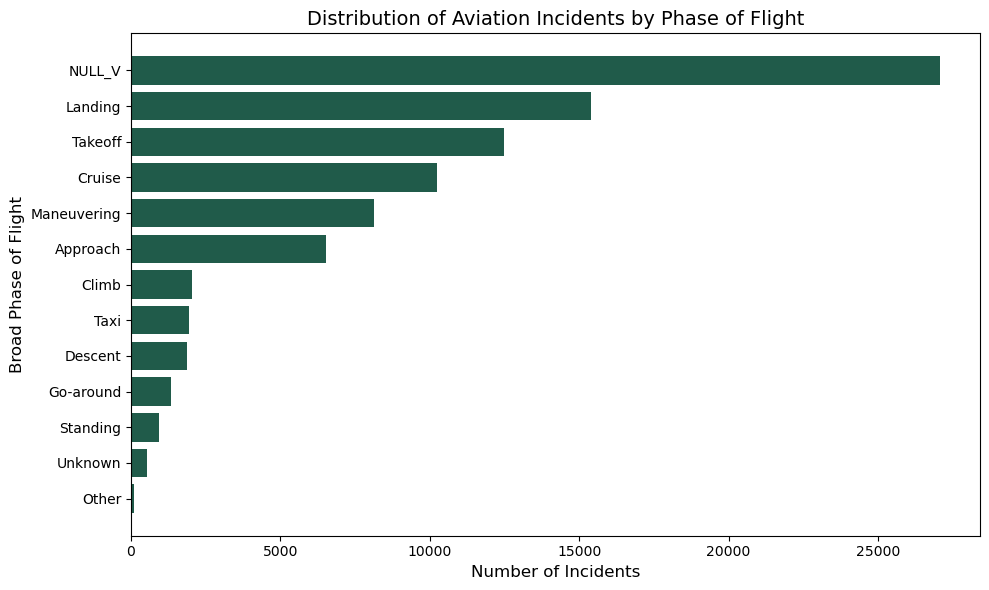

In [1550]:
# Count the number of occurrences for each phase
phase_of_flight = aviation_data['Broad.phase.of.flight'].value_counts()

# Sort the values in ascending order for better readability
phase_of_flight = phase_of_flight.sort_values()

# Set up the figure and axis 
fig, ax = plt.subplots(figsize=(10, 6))

# Extract x (categories) and y (counts) for plotting
x = phase_of_flight.index
y = phase_of_flight.values

# Create a horizontal bar chart
ax.barh(x, y, color='#205B4A')

# Add axis labels and a title
ax.set_xlabel('Number of Incidents', fontsize=12)
ax.set_ylabel('Broad Phase of Flight', fontsize=12)
ax.set_title('Distribution of Aviation Incidents by Phase of Flight', fontsize=14)

# Optional: Improve layout and spacing
plt.tight_layout()

# Display the plot
plt.show()


## Flight Phase Distribution in Aviation Incidents

**Findings:**
- **NULL_V (Missing Data):** Majority of records
- Among known phases:
  - **Landing:** Highest incident count
  - **Takeoff:** Second highest
  - **Cruise:** Moderate incident count
  - **Maneuvering:** Notable incidents
  - **Approach & Climb:** Fewer incidents

**Interpretation:**
1. **Data Limitations:**
   - Significant portion of records contain missing flight phase data (`NULL_V`)
   - Analysis limited to available phase information

2. **High-Risk Phases:**
   - **Landing** shows highest incident frequency, likely due to:
     - Precise speed/altitude requirements
     - Time pressure and pilot workload
   - **Takeoff** as second-highest risk phase involves:
     - Critical power management
     - Configuration changes

3. **Operational Patterns:**
   - Transitional phases (landing/takeoff) dominate incident statistics
   - Cruise flight shows moderate risk despite longer duration
   - Approach/climb incidents may relate to:
     - Airspace congestion
     - ATC communication

4. **Research Alignment:**
   - Results consistent with established aviation safety literature
   - Confirms known risk distribution across flight phases

<p><h3>Aircraft.damage distribution</h3></p>

To better understand the impact of aviation incidents, I visualize the **Aircraft.damage** distribution using a pie chart. This helps identify how often accidents result in **minor**, **substantial**, or **destroyed** aircraft, while also accounting for **unknown** and missing (**NULL_V**) values.


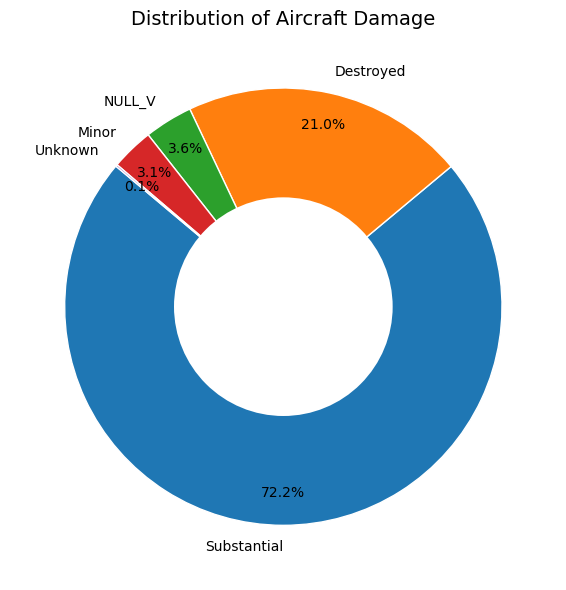

In [1551]:
# Count the number of occurrences for each aircraft damage category
aircraft_damage = aviation_data['Aircraft.damage'].value_counts()

# Create a figure and axis object for the pie chart
fig, ax = plt.subplots(figsize=(8, 6))  

# Extract values and labels
x = aircraft_damage.values  # The counts for each category
y = aircraft_damage.index   # The category labels

# Plot the pie chart
ax.pie(
    x, 
    labels=y, 
    autopct='%1.1f%%',      # Display percentages with 1 decimal
    startangle=140,         # Rotate start for better layout
    pctdistance=0.85,       # Distance of percentage text from center
    labeldistance=1.1,      # Distance of labels from center
    wedgeprops={'edgecolor': 'white'}  # Add white borders between slices
)

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(centre_circle)

# Add title
plt.title('Distribution of Aircraft Damage', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

## Aircraft Damage Severity Distribution

**Findings:**
- **Substantial Damage:** 72.2% of incidents
- **Destroyed:** 21% of incidents
- **Minor Damage:** 3.1% of incidents
- **NULL_V (Missing Data):** 3.6%
- **Unknown:** 0.1%

**Interpretation:**
1. The overwhelming majority (72.2%) of incidents result in **substantial damage**, indicating:
   - Most accidents cause significant but not complete airframe loss
   - Potential for costly repairs and operational downtime

2. **Destroyed aircraft (21%)** represent:
   - The most severe accident outcomes
   - Complete hull losses with major financial implications

3. **Minor damage cases (3.1%)** are notably rare, suggesting:
   - Either low-severity accidents are uncommon
   - Or there may be underreporting of minor incidents

4. Data quality considerations:
   - Minimal missing/unknown values (3.7% combined)
   - Overall dataset appears reliable for analysis

<p><h3>Distribution of weather conditions during incidents</h3></p>

To better understand the role of environmental factors in aviation accidents, the following pie chart illustrates the distribution of weather conditions during incidents. This visualization is essential for identifying whether poor weather significantly contributes to accident risk and helps inform decisions about operational safety and risk mitigation.

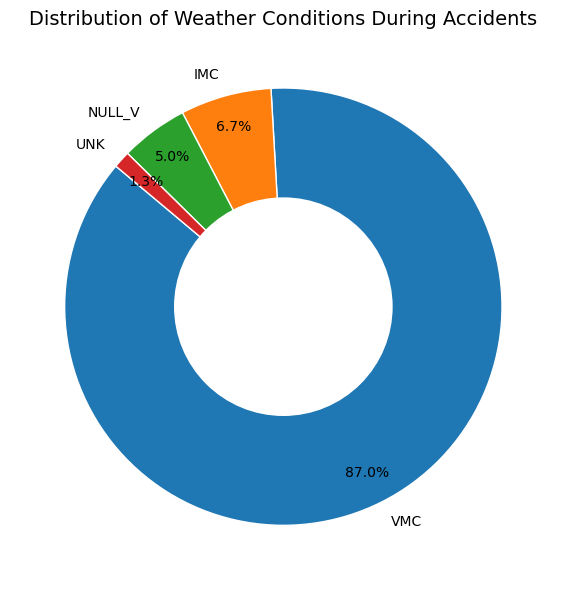

In [1552]:
# Count the number of occurrences for each weather condition category
weather_condition = aviation_data['Weather.Condition'].value_counts()

# Create a figure and axis object for the pie chart
fig, ax = plt.subplots(figsize=(8, 6))  

# Extract values and labels
x = weather_condition.values  # The counts for each condition
y = weather_condition.index   # The category labels

# Plot the pie chart
ax.pie(
    x,
    labels=y,
    autopct='%1.1f%%',        # Show percentages with 1 decimal place
    startangle=140,           # Rotate to start from a better angle
    pctdistance=0.85,         # Set distance of percentage labels from center
    labeldistance=1.1,        # Set distance of labels from center
    wedgeprops={'edgecolor': 'white'}  # White edges for separation
)

# Optional: add a white circle to create a donut chart
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(centre_circle)

# Add title
plt.title('Distribution of Weather Conditions During Accidents', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


## Weather Condition Distribution in Aviation Accidents

**Findings:**
- **VMC (Clear Weather):** 87% of accidents
- **IMC (Poor Weather):** 6.7% of accidents 
- **UNK (Unknown):** 5%
- **NULL_V (Missing Data):** 1.3%

**Interpretation:**
1. The vast majority (87%) of accidents occur in **visual flight conditions (VMC)**, suggesting:
   - Human factors (pilot decision-making, situational awareness) may dominate accident causes
   - Potential complacency in good weather conditions

2. While **IMC accidents are rare (6.7%)**, they are:
   - Typically more severe (higher likelihood of fatal outcomes)
   - Often involve spatial disorientation or system failures

3. Data quality appears reliable with:
   - Only 5% unknown weather status
   - Minimal (1.3%) missing values

---

## Incident Distribution by Engine Type

This chart reveals which engine types are involved in the most aviation incidents. The results help identify higher-risk propulsion systems that may require additional safety measures or operational restrictions.

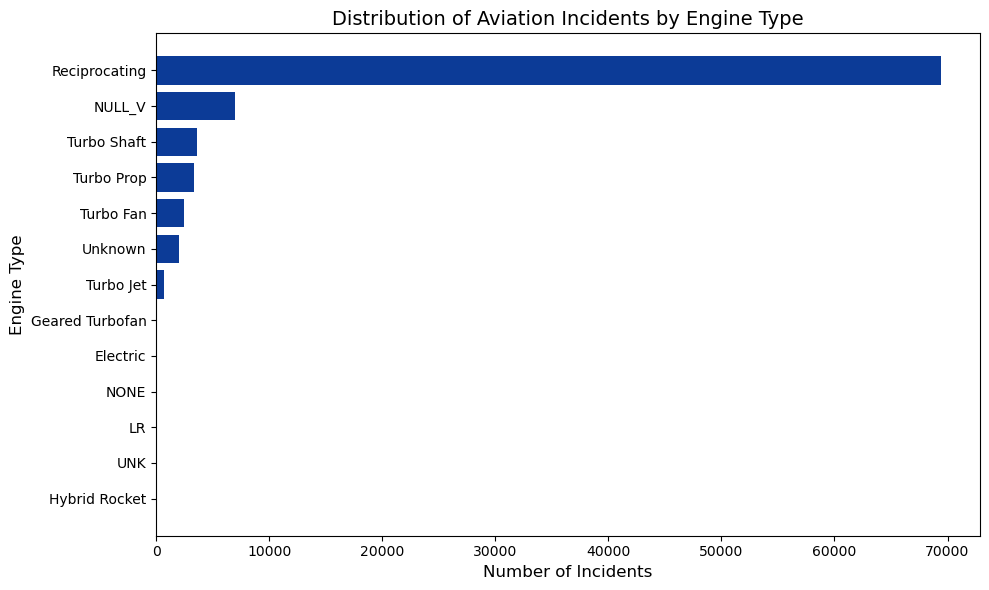

In [1553]:
# Count the number of occurrences for each engine type
engine_type = aviation_data['Engine.Type'].value_counts()

# Sort the values in ascending order for better readability
engine_type = engine_type.sort_values()

# Set up the figure and axis 
fig, ax = plt.subplots(figsize=(10, 6))

# Extract x (categories) and y (counts) for plotting
x = engine_type.index
y = engine_type.values

# Create a horizontal bar chart
ax.barh(x, y, color='#0C3B97')  # Using the same green color as before

# Add axis labels and a title
ax.set_xlabel('Number of Incidents', fontsize=12)
ax.set_ylabel('Engine Type', fontsize=12)
ax.set_title('Distribution of Aviation Incidents by Engine Type', fontsize=14)

# Optional: Improve layout and spacing
plt.tight_layout()

# Display the plot
plt.show()

## Engine Type Incident Analysis

**Key Findings:**
1. **Reciprocating (Piston) Engines**  
   - Highest incident rate  
   - Common in general aviation (smaller aircraft)  
   - Higher maintenance requirements  

2. **Turboshaft/Turboprop Engines**  
   - Moderate incident frequency  
   - Used in helicopters/regional aircraft  

3. **Turbofan Engines**  
   - Lower incident occurrence  
   - Typical in commercial airliners  

**Data Notes:**  
- Significant `NULL_V` values present (affects completeness)  
- Results align with known industry risk profiles  

**Implications:**  
Piston-engine aircraft may require:  
✓ Enhanced maintenance protocols  
✓ Additional pilot training  
✓ More frequent inspections  

---

## Aviation Safety Analysis by Injury Severity

**Objective:**  
Identify the safest aircraft models by analyzing four injury severity categories:

1. **Fatal Injuries** - Highest-risk models to avoid
2. **Serious Injuries** - Frequent severe accident models
3. **Minor Injuries** - Common low-severity incident models
4. **Uninjured Cases** - Best-performing safety models

**Methodology:**
- Data: Combined `Make + Model` as `Aircraft.Type`
- Metrics: Injury counts normalized per incident
- Sorting: Highest to lowest risk for each category

**Visualization Guide:**
Each subsequent graph shows model performance for one injury category, enabling comparative safety assessment.

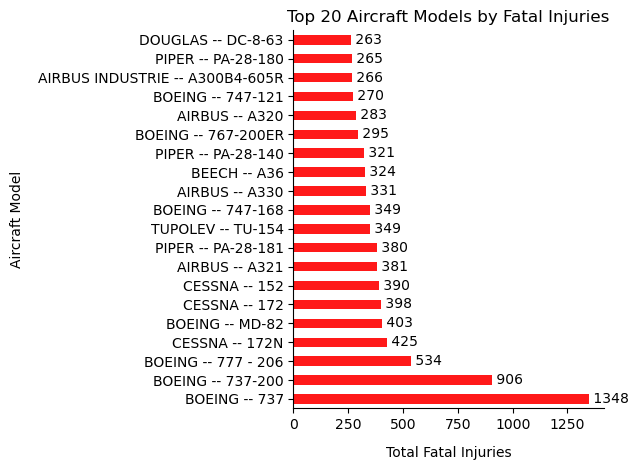

In [1554]:
fatal_by_model = (
    aviation_data.groupby('Aircraft.Type')[['Total.Fatal.Injuries']]
    .sum()
    .sort_values('Total.Fatal.Injuries', ascending=False)
    .head(20)  # Top 20 most fatal models
)

# Plot with custom colors
fatal_by_model.plot(
    kind='barh',
    color='red',  
    alpha=0.9,        
    legend=False      
)

# Add titles and labels
plt.title('Top 20 Aircraft Models by Fatal Injuries')
plt.xlabel('Total Fatal Injuries', labelpad=10)
plt.ylabel('Aircraft Model', labelpad=10)

# Add value labels at the end of each bar
for index, value in enumerate(fatal_by_model['Total.Fatal.Injuries']):
    plt.text(value, index, f' {int(value)}', va='center')

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  
plt.show()

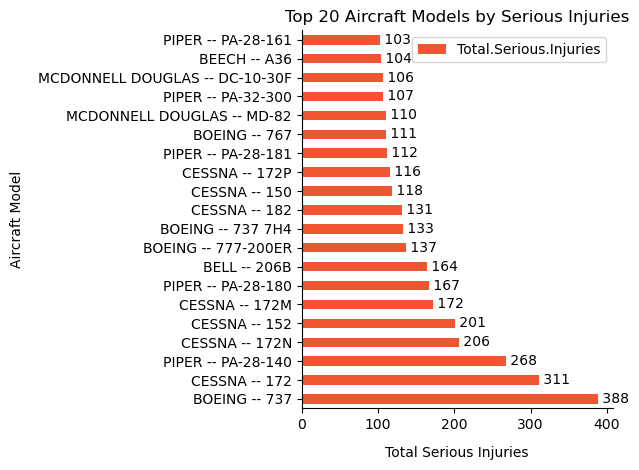

In [1555]:
serious_by_model = (
    aviation_data.groupby('Aircraft.Type')[['Total.Serious.Injuries']]
    .sum()
    .sort_values('Total.Serious.Injuries', ascending=False)
    .head(20)  # Top 20 models with most serious injuries
)
serious_by_model.plot(kind='barh', color='#F05532')
# Add titles and labels
plt.title('Top 20 Aircraft Models by Serious Injuries')
plt.xlabel('Total Serious Injuries', labelpad=10)
plt.ylabel('Aircraft Model', labelpad=10)

# Add value labels at the end of each bar
for index, value in enumerate(serious_by_model['Total.Serious.Injuries']):
    plt.text(value, index, f' {int(value)}', va='center')

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  
plt.show()


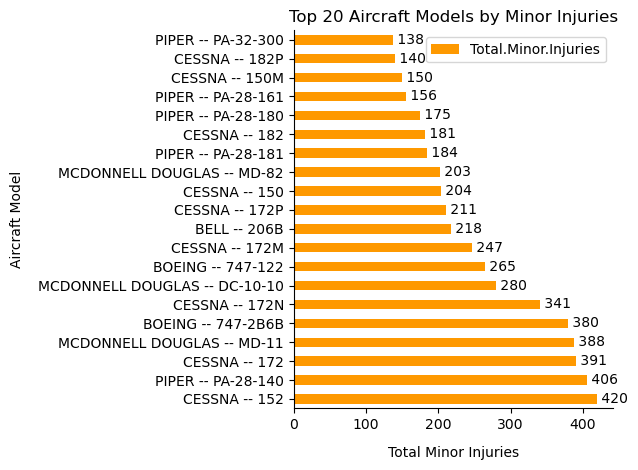

In [1556]:
minor_by_model = (
    aviation_data.groupby('Aircraft.Type')[['Total.Minor.Injuries']]
    .sum()
    .sort_values('Total.Minor.Injuries', ascending=False)
    .head(20)  # Top 20 models with most minor injuries
)
minor_by_model.plot(kind='barh', color='#FE9900')
# Add titles and labels
plt.title('Top 20 Aircraft Models by Minor Injuries')
plt.xlabel('Total Minor Injuries', labelpad=10)
plt.ylabel('Aircraft Model', labelpad=10)

# Add value labels at the end of each bar
for index, value in enumerate(minor_by_model['Total.Minor.Injuries']):
    plt.text(value, index, f' {int(value)}', va='center')

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  
plt.show()

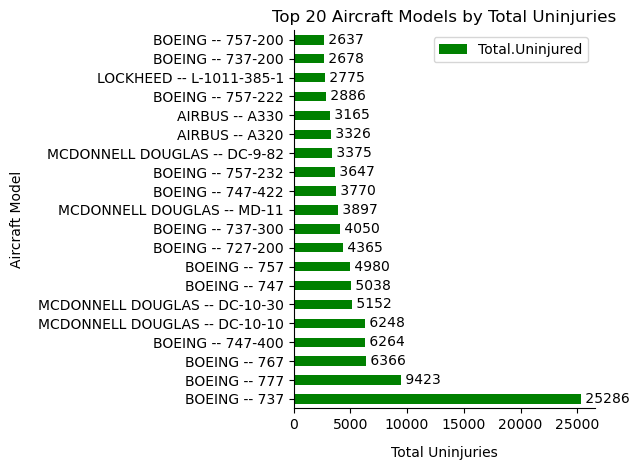

In [1557]:
safe_by_model = (
    aviation_data.groupby('Aircraft.Type')[['Total.Uninjured']]
    .sum()
    .sort_values('Total.Uninjured', ascending=False)
    .head(20)  # Top 20 safest models
)
safe_by_model.plot(kind='barh', color='green')
# Add titles and labels
plt.title('Top 20 Aircraft Models by Total Uninjuries')
plt.xlabel('Total Uninjuries', labelpad=10)
plt.ylabel('Aircraft Model', labelpad=10)

# Add value labels at the end of each bar
for index, value in enumerate(safe_by_model['Total.Uninjured']):
    plt.text(value, index, f' {int(value)}', va='center')

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  
plt.show()

In [1563]:
# aviation_data.groupby('Purpose.of.flight')[['Total.Uninjured']].sum().sort_values('Total.Uninjured', ascending=False)

,Total.Uninjured
Purpose.of.flight,
NULL_V,190337.0
Unknown,166157.0
Personal,55431.0
Instructional,13018.0
Business,6657.0
Aerial Application,3184.0
Positioning,2293.0
Other Work Use,2000.0
Public Aircraft,1759.0
